# Working with March Madness Data

Working with data usually involves:

1. Obtaining data
2. Cleaning data
3. Labeling data
4. Analyzing data
5. Training & running models on data

All of these can be done with python. We're gonna do a few today.

## Data Source

1. Make a new folder in this directory called `_sources` 
2. Clone or download [this GitHub directory](https://github.com/treyhakanson/m3) into it. So you should be able to go to the `IntroToPython/_sources/m3/README.md` file accessible from the root. 
3. Optionally, explore these files and the README. In the `src` file, you can find some example code that scrapes and visualizes this data. We're not going to directly use these Python scripts here, but you can view them for reference or use them yourselves.

Without doing this, the below code snippets will not work!

In [95]:
# Let's start with loading a CSV file.

import csv

# pprint is a library that helps us print things in a clearer way than just using "print", optional
import pprint 

csv_file = "_sources/m3/rosters/ohio-state-roster.csv"

with open(csv_file, 'r') as f:
    reader = csv.reader(f)
    osu_team_roster = list(reader)
        
pp = pprint.PrettyPrinter(depth=2)
pp.pprint(osu_team_roster)

print(osu_team_roster)

[['',
  'Name',
  'Number',
  'Year',
  'Position',
  'Height',
  'Weight',
  'Hometown',
  'High School',
  'PPG',
  'RPG',
  'APG'],
 ['0',
  'Kaleb Wesson',
  '34',
  'SO',
  'F',
  '6-9',
  '270',
  'Westerville, OH',
  'Westerville South High School',
  ' 14.4 Pts',
  '6.8 Reb',
  '1.8 Ast'],
 ['1',
  'C.J. Jackson',
  '3',
  'SR',
  'G',
  '6-1',
  '175',
  'Charlotte, NC',
  'Montverde Academy',
  ' 12.2 Pts',
  '4.0 Reb',
  '3.5 Ast'],
 ['2',
  'Andre Wesson',
  '24',
  'JR',
  'F',
  '6-6',
  '220',
  'Westerville, OH',
  'Westerville South HIgh School',
  ' 8.8 Pts',
  '4.0 Reb',
  '1.7 Ast'],
 ['3',
  'Luther Muhammad',
  '1',
  'FR',
  'G',
  '6-3',
  '185',
  'Jersey City, NJ',
  'Hudson Catholic HS',
  ' 8.0 Pts',
  '2.8 Reb',
  '1.8 Ast'],
 ['4',
  'Keyshawn Woods',
  '32',
  'SR',
  'G',
  '6-3',
  '205',
  'Gastonia, NC',
  'Northside Christian Academy',
  ' 7.7 Pts',
  '3.0 Reb',
  '2.4 Ast'],
 ['5',
  'Duane Washington Jr.',
  '4',
  'FR',
  'G',
  '6-3',
  '190',
  

**Now let's do some operations and basic analysis on here.**

There's a lot of different ways to do the same thing - with performance or readability tradeoffs. 
This is a choice you're going to have to make depending on your experience and teammates. 
- Sometimes people with a lot of Python experience write very short, performant but hard to read code.
- Other times people pick readability over length of code. 

In [115]:
""" 
1. Create a list of the names of everyone on the team. 

We get rid of the 0th row because that's the headers
"""

# Method 1: For loop
osu_team_names_1 = []
for index in range(len(osu_team_roster)):
    if (index != 0):
        osu_team_names_1.append(osu_team_roster[index][1])

        
# This first method's logic works in all programming languages, but is more verbose and slower than the ones below.
# Python has a lot of tools to help make basic data operations easy.
    

# Method 2: For loop with splice
osu_team_names_2 = []
for player in osu_team_roster[1:]:
    osu_team_names_2.append(player[1])

    
# Method 3: List comprehension with delete
osu_team_names_3 = [player[1] for player in osu_team_roster]
del osu_team_names_3[0] 


# Method 4: List comprehension with array splice
osu_team_names_4 = [player[1] for player in osu_team_roster[1:]]

print(osu_team_names_1)
print(osu_team_names_1 == osu_team_names_2 == osu_team_names_3 == osu_team_names_4)

""" 
2. Get the average weight of everyone on the team 

We use player[6] since the 6th element of the player array is weight
"""

# Method 1: For loop with full weight array
osu_team_weights = []
for player in osu_team_roster[1:]:
    osu_team_weights.append(int(player[6]))
osu_team_avg_weight_1 = sum(osu_team_weights) / (len(osu_team_roster) - 1)
print(osu_team_avg_weight_1)


# Method 2: List comprehension with total weight summing
osu_team_total_weight = sum([int(player[6]) for player in osu_team_roster[1:]])
osu_team_avg_weight_2 = osu_team_total_weight / (len(osu_team_roster) - 1)
print(osu_team_avg_weight_2)

# Method 3: Mean function
from statistics import mean
osu_team_avg_weight_3 = mean(osu_team_weights)
print(osu_team_avg_weight_3)


""" 
3. Create a mapping of the hometowns and their frequency. 
e.g. {'Jersey City, NJ': 1, 'Westerville, OH': 2, ...}
"""

# Method 1: Loop

player_hometowns_count_1 = {}

for player in osu_roster[1:]:
    player_hometown = player[7]
    if (player_hometown in player_hometowns_count_1):
        player_hometowns_count_1[player_state] += 1
    else:
        player_hometowns_count_1[player_state] = 1
        
# Method 2: Loop with defaultdict with list comprehension
# defaultdict is a dict that defaults all values to 0 for ints
# See here: https://docs.python.org/3/library/collections.html for more info

from collections import defaultdict

player_hometowns_count_2 = defaultdict(int)
player_hometowns = [player[7] for player in osu_roster]
for hometown in player_hometowns:
    player_states_count_2[hometown] += 1
    
# optional step to convert back to dict
player_hometowns_count_2 = dict(player_hometowns_count_2) 
        
print(player_states_count_2)

['Kaleb Wesson', 'C.J. Jackson', 'Andre Wesson', 'Luther Muhammad', 'Keyshawn Woods', 'Duane Washington Jr.', 'Kyle Young', 'Musa Jallow', 'Justin Ahrens', 'Jaedon Ledee', 'Joey Lane', 'Daniel Hummer', 'Harrison Hookfin', 'CJ Walker']
True
200.71428571428572
200.71428571428572
200.71428571428572
{'Hometown': 2, 'Westerville, OH': 4, 'Charlotte, NC': 2, 'Jersey City, NJ': 2, 'Gastonia, NC': 2, 'Grand Rapids, MI': 2, 'Canton, OH': 2, 'Bloomington, IN': 2, 'Versailles, OH': 2, 'Houston, TX': 2, 'Deerfield, IL': 2, 'Upper Arlington, OH': 2, 'Lebanon, OH': 2, 'Indianapolis, IN': 2}


In [121]:
# Challenges:
# You might need to use Stackoverflow here!
# Helpful StackOverflow search: "Python split string into list"  

"""
1. Create a mapping of each of the States and their frequency.
e.g. {'OH': 4, 'NJ': 1, ...}
"""

osu_states_frequency_map = {}

"""
2. Return the heights of everyone on the team in a list. Then get the mean height.

This is tricky, because you have to consider the inches as 1/12th of a ft, and convert accordingly.
"""

osu_team_heights = []
osu_average_height = 0

**We can also work with the `csv.reader` object directly instead of converting to the `list` version.**

You can [read more about this in the official Python docs](https://docs.python.org/3/library/csv.html#examples)

In [ ]:
import csv

csv_file = "_sources/m3/rosters/ohio-state-roster.csv"

with open(csv_file, 'r') as f:
    reader = csv.reader(f)
    osu_team_roster_csv = reader
    
    # Let's print all the rows and collect weights while we're at it
    
    osu_team_weights = []
    
    for row in osu_team_roster_csv:
        print(row)
        if (row[0] != ''): # Skip first row
            osu_team_weights.append(row[6])
            
    print(osu_team_weights)
        
        
    # Now there are no more rows to print, since the above statement "reads" all of them.
    
    for row in osu_team_roster_csv:
        print(row)
        
    # So this above statement doesn't do anything now, even though we'd expect a second copy of the file to be printed.

In [113]:
# There is also another reader function called DictReader that we can work with!

# This makes each row a OrderedDict object instead of a list.
# OrderedDict is an object that's a dict, but ordered!
# This is kinda like a list and a dict at once, since it has an order and maintains it, and lets you look at keys directly.
# See here: https://docs.python.org/3/library/collections.html for more info

import csv, pprint

csv_file = "_sources/m3/rosters/ohio-state-roster.csv"

# Let's print the name, number, and year of all players, and a list containing all of them.

with open(csv_file, 'r') as f:
    reader = csv.DictReader(f)
    osu_team_roster_dict = []
    for row in reader:
        print(row["Name"] + " " + row["Number"] + " " + row["Year"])
        osu_team_roster_dict.append(row)
    
pp = pprint.PrettyPrinter(depth=4)
pp.pprint(osu_team_roster_dict)

# For example, we could get the PPG (points per game) of the 5th player...

print(osu_team_roster_dict[5]["PPG"])

# If we don't want the OrderedDict, we can just use a regular dict too.

print(osu_team_roster_dict[5])
print(dict(osu_team_roster_dict[5])) # This does not mutate (change) the original osu_team_roster_dict

Kaleb Wesson 34 SO
C.J. Jackson 3 SR
Andre Wesson 24 JR
Luther Muhammad 1 FR
Keyshawn Woods 32 SR
Duane Washington Jr. 4 FR
Kyle Young 25 SO
Musa Jallow 2 SO
Justin Ahrens 10 FR
Jaedon Ledee 23 FR
Joey Lane 14 SR
Daniel Hummer 40 JR
Harrison Hookfin 42 FR
CJ Walker 13 JR
[OrderedDict([('', '0'),
              ('Name', 'Kaleb Wesson'),
              ('Number', '34'),
              ('Year', 'SO'),
              ('Position', 'F'),
              ('Height', '6-9'),
              ('Weight', '270'),
              ('Hometown', 'Westerville, OH'),
              ('High School', 'Westerville South High School'),
              ('PPG', ' 14.4 Pts'),
              ('RPG', '6.8 Reb'),
              ('APG', '1.8 Ast')]),
 OrderedDict([('', '1'),
              ('Name', 'C.J. Jackson'),
              ('Number', '3'),
              ('Year', 'SR'),
              ('Position', 'G'),
              ('Height', '6-1'),
              ('Weight', '175'),
              ('Hometown', 'Charlotte, NC'),
              (

### Note about data structures and performance

Another way we might structure the data is have a dict that refers to each player. So we can make a name-based dict and do `osu_team_roster_dict["Duane Washington Jr."]` to find the data on `Duane Washington Jr.`.

But this just depends on your data needs! Structuring data choices area really important, since it affects how easy or difficult a data task might be.

For example, if my query was `height of "Duane Washington Jr."`, the name-based dict is really quick, since we can just do `osu_team_roster_dict["Duane Washington Jr."]["Height"]` but the list version or list-of-OrderedDicts used above would require you to search up to the entire list till you found Duane.

This time can be modeled as **time-complexity**, and in this case, it would be `O(n)` for searching the entire list for Duane, where `n = number of players on team`. This means it takes linear time based on the number of players on the team to solve this problem. For using the name-based dict, we have `O(1)` or constant time, since dicts have constant lookup time. 

To be more specific, we have a best-case-scenario of `O(1)` (found in the 1st element), an average-case of `O(n/2)` (half the elements) which simplifies to `O(n)` in this **big-O notation** and a WORST-CASE of `O(n)` (found in the last element). [Read more here](https://brilliant.org/wiki/big-o-notation/).

This isn't an issue for our small roster of 13 players, but if we had 1,000,000, it would be a big improvement to use the name-based dict. However, the name-based dict takes more space. Space v. time complexity is a big topic, and discussing these trade-offs is a big part of Computer Science.

`O(1) > O(log(n)) O(n) > O(n^2) > O(n!) > O(n^n)` -- these are some other common time/space-complexities. 

## Now let's work with the data some more!

You also can go to the [GitHub page to browse and read about the dataset](https://github.com/treyhakanson/m3). 

Example challenges:
- How does height correlate with weight? What's the average height/weight?
- How does height correlate with position? What's the average height for each position?
- How does average height of a team correlate with win rate? Or does each team pretty much have a similar average height?
- What players are outliers, consistent MVPs of their teams?
- Does hometown correlate with points or wins, how much? Do some states produce a disproportionate amount of good players?
- How does average seniority of a team (FR, SO, JR, SR) correlate with win percentage?
- Or...come up with your own!

Let's tackle and graph one of these challenges, using more teams than just OSU.

<IPython.core.display.Javascript object>


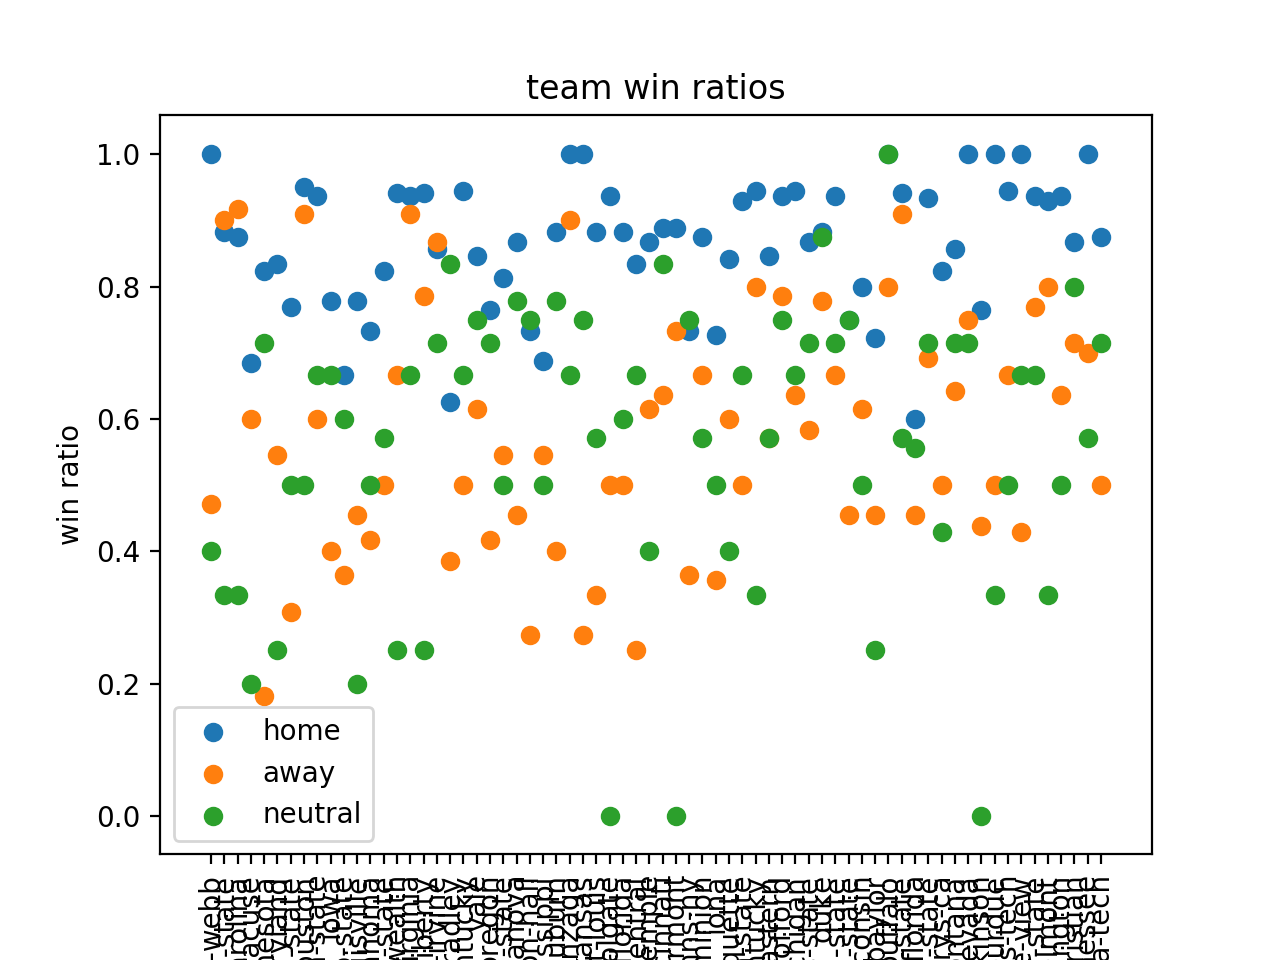

In [6]:
# How do winrates compare being at home, vs away, vs neutral?

import os, csv

schedules_directory = "_sources/m3/schedules"

team_winrates = {}
team_winrates_percentages = {}

for file in os.listdir(os.fsencode(schedules_directory)):
    filename = os.fsdecode(file)
    if filename.endswith(".csv"): 
        csv_file = os.path.join(schedules_directory, filename)
        
        team_name = "-".join(filename.split('-')[:-1])
        with open(csv_file, 'r') as f:
            reader = csv.DictReader(f)
            team_schedule = list(reader)
            
            home_games = [0, 0] # home_games[0] is wins, [1] is plays
            away_games = [0, 0] 
            neutral_games = [0, 0]
            
            for game in team_schedule:
                game_location = game["Home/Away"]
                game_outcome = game["Outcome"]
            
                if (game_location == "@"):
                    away_games[1] += 1
                    if (game_outcome == "W"):
                        away_games[0] += 1
                elif (game_location == ""):
                    home_games[1] += 1
                    if (game_outcome == "W"):
                        home_games[0] += 1
                else:
                    neutral_games[1] += 1
                    if (game_outcome == "W"):
                        neutral_games[0] += 1
                        
            team_winrates[team_name] = [home_games, away_games, neutral_games]    
            team_winrates_percentages[team_name] = [home_games[0] / home_games[1], away_games[0] / away_games[1], neutral_games[0] / neutral_games[1]]

# pp.pprint(team_winrates_percentages)
            
# MAP of { teamname: [WINRATE @ HOME, WINRATE AWAY, WINRATE NEUTRAL] } 
# Average of all 3...

%matplotlib notebook

import matplotlib 
import matplotlib.pyplot as plt

data_x = list(team_winrates_percentages.keys())
data_y_home = [team_winrates_percentages[teams][0] for teams in team_winrates_percentages]
data_y_away = [team_winrates_percentages[teams][1] for teams in team_winrates_percentages]
data_y_neutral = [team_winrates_percentages[teams][2] for teams in team_winrates_percentages]

plt.scatter(data_x, data_y_home, label="home")
plt.scatter(data_x, data_y_away, label="away")
plt.scatter(data_x, data_y_neutral, label="neutral")
plt.legend()
plt.title("team win ratios")
plt.ylabel('win ratio')
plt.xlabel('team')
plt.xticks(rotation=90)

plt.show()

# https://stackoverflow.com/questions/36367986/how-to-make-inline-plots-in-jupyter-notebook-larger
# https://matplotlib.org/gallery/lines_bars_and_markers/categorical_variables.html
# https://stackoverflow.com/questions/10998621/rotate-axis-text-in-python-matplotlib

# possible improvements:
# - draw lines that represent the home, away, neutral averages in their proper colors
# - [hard] find way to show the team names better
# - play with variables to add more visual clarity
# - [hard] add interactivity via tooltips

In [123]:
# Bonus scripts

"""
1. Find list of all teams with schedules by using directory
# https://stackoverflow.com/a/3215392
"""

import glob
files = glob.glob("_sources/m3/schedules/*")
teams = sorted([file.split("/")[3].split('.')[0][:-9] for file in files])


"""
2. Looping through all files in directory 
"""

import os

schedules_directory = "_sources/m3/schedules"

for file in os.listdir(os.fsencode(schedules_directory)):
    filename = os.fsdecode(file)
    if filename.endswith(".csv"): 
        print(os.path.join(schedules_directory, filename))
        
        # We can read each file here and do operations, like add them to a big object

_sources/m3/schedules/gardner-webb-schedule.csv
_sources/m3/schedules/louisiana-state-schedule.csv
_sources/m3/schedules/north-carolina-schedule.csv
_sources/m3/schedules/syracuse-schedule.csv
_sources/m3/schedules/minnesota-schedule.csv
_sources/m3/schedules/maryland-schedule.csv
_sources/m3/schedules/north-dakota-state-schedule.csv
_sources/m3/schedules/houston-schedule.csv
_sources/m3/schedules/florida-state-schedule.csv
_sources/m3/schedules/iowa-schedule.csv
_sources/m3/schedules/ohio-state-schedule.csv
_sources/m3/schedules/louisville-schedule.csv
_sources/m3/schedules/oklahoma-schedule.csv
_sources/m3/schedules/mississippi-state-schedule.csv
_sources/m3/schedules/virginia-commonwealth-schedule.csv
_sources/m3/schedules/virginia-schedule.csv
_sources/m3/schedules/liberty-schedule.csv
_sources/m3/schedules/california-irvine-schedule.csv
_sources/m3/schedules/bradley-schedule.csv
_sources/m3/schedules/northern-kentucky-schedule.csv
_sources/m3/schedules/yale-schedule.csv
_sources/m